# Practical Statistics for Data Scientists (Python)
# Chapter 1. Exploratory Data Analysis

Import required Python packages.

In [34]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import trim_mean
from scipy import stats
from statsmodels import robust
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

print("Imports Done!")

Imports Done!


Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [35]:
DATA = "~/PycharmProjects/Datasets/"
mtcar_path = DATA + "mtcars.csv"
mtcar = pd.read_csv(mtcar_path)

In [36]:
mtcar.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [37]:
mtcar.shape

(32, 12)

In [38]:
mtcar.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [39]:
mtcar_df = mtcar.copy()

In [40]:
mtcar_df = mtcar_df.rename(columns={"Unnamed: 0" : "Car Model"})

In [41]:
mtcar_df["vs"] = mtcar_df["vs"].replace({0 : "V", 1 : "S"})

In [42]:
mtcar_df["am"] = mtcar_df["am"].replace({0 : "Auto", 1 : "Manual"})

In [43]:
result = mtcar_df["qsec"][(mtcar_df["cyl"] != 3) & (mtcar_df["mpg"] > 20)].mean()
result

18.81642857142857

In [44]:
mtcar_df.groupby(["vs", "am"]).agg({"hp" : "mean"})

hp
vs am                
S  Auto    102.142857
   Manual   80.571429
V  Auto    194.166667
   Manual  180.833333

In [45]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [46]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [47]:
mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

mpg       disp
am     vs                     
Auto   S   2.471071  49.130725
       V   2.774396  71.823494
Manual S   4.757701  18.802128
       V   4.008865  95.233616

In [48]:
my_stats = mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

In [49]:
descriptions_stat = mtcar_df.groupby(["am"]).agg("std").loc[:, ["hp", "disp"]]
descriptions_stat

,hp,disp
am,,
Auto,53.908196,110.171647
Manual,84.062324,87.203989


In [50]:
round(mtcar_df.groupby(["am", "vs"]).agg({"qsec" : ["count", "min", "max", "mean", "std", "sem"]}), 2)

qsec                                 
          count    min    max   mean   std   sem
am     vs                                       
Auto   S      7  18.30  22.90  19.97  1.46  0.55
       V     12  15.41  18.00  17.14  0.80  0.23
Manual S      7  16.90  19.90  18.70  0.95  0.36
       V      6  14.50  17.02  15.80  1.09  0.45

In [51]:
mtcar_df.isna().sum()

Car Model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

Dealing with NA 

In [52]:
# mtcar_df.head(15)

In [53]:
# mtcar_df["mpg"].mean()

In [54]:
# mtcar_df["mpg"].iloc[1:10] = None

In [55]:
# mtcar_df.head(15)

In [56]:
# mtcar_df["mpg"].mean()

<AxesSubplot:xlabel='mpg', ylabel='Count'>

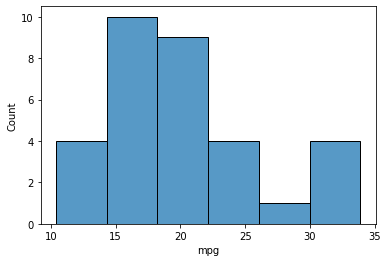

In [57]:
sns.histplot(mtcar_df["mpg"])

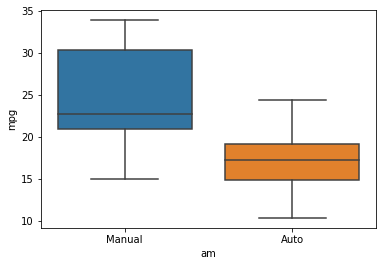

In [58]:
ax = sns.boxplot(x="am", y="mpg", data=mtcar_df)

<AxesSubplot:xlabel='mpg', ylabel='hp'>

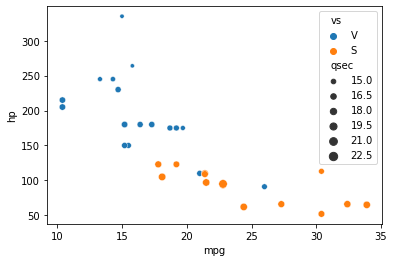

In [59]:
sns.scatterplot(data=mtcar_df, x="mpg", y="hp", hue="vs", size= "qsec")

<AxesSubplot:xlabel='mpg', ylabel='disp'>

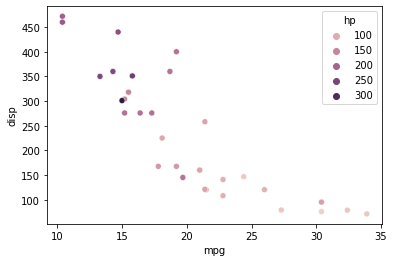

In [60]:
sns.scatterplot(data=mtcar_df, x="mpg", y="disp", hue="hp")

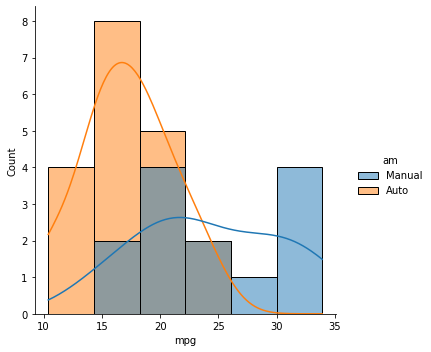

In [61]:
sns.displot(data=mtcar_df, x="mpg", hue="am", kde=True)

In [62]:
mtcar_df.head()

,Car Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V,Manual,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V,Manual,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,S,Manual,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,S,Auto,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V,Auto,3,2


In [63]:
d = mtcar_df.groupby(["vs", "am"])["am"].count().unstack()
d

am,Auto,Manual
vs,,
S,7,7
V,12,6


In [64]:
p_value = st.fisher_exact(d)[1]

In [65]:
# Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# mtcar_path = PATH_TO_DATA + "mtcars.csv"
# mtcar = pd.read_csv(mtcar_path)
# d = mtcar.groupby(["vs", "am"])["am"].count().unstack()
# p_value = scipy.stats.fisher_exact(d)[1]

### NEW DATASET 

In [66]:
DATA = "~/PycharmProjects/Datasets/"
airquality_path = DATA + "airquality.csv"
airquality = pd.read_csv(airquality_path)

In [67]:
airquality = airquality.drop("Unnamed: 0", axis=1)

In [68]:
airquality.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [69]:
airquality_df = airquality.copy()

In [70]:
airquality_df.loc[airquality_df.Month >= 7]
# ИЛИ
airquality_df.query("Month >= 7")

,Ozone,Solar.R,Wind,Temp,Month,Day
61,135.0,269.0,4.1,84,7,1
62,49.0,248.0,9.2,85,7,2
63,32.0,236.0,9.2,81,7,3
64,NaN,101.0,10.9,84,7,4
65,64.0,175.0,4.6,83,7,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [71]:
aq_ss = airquality_df.query("Month >= 7")

In [72]:
aq_ss.groupby("Month").agg({"Ozone" : "count"})
# ИЛИ 
# airquality_df.query("Month >= 7").groupby("Month").agg({"Ozone" : "count"})

,Ozone
Month,
7,26
8,26
9,29


<AxesSubplot:xlabel='Month', ylabel='Ozone'>

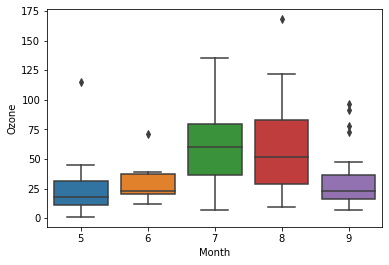

In [73]:
sns.boxplot(x="Month", y="Ozone", data=airquality_df)

### NEW DATASET

In [74]:
DATA = "~/PycharmProjects/Datasets/"
iris_path = DATA + "iris.csv"
iris = pd.read_csv(iris_path, index_col=0)

In [75]:
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [76]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [77]:
iris.agg("std")

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [78]:
iris[iris.Species == "virginica"].median().sort_values(ascending=False)

Sepal.Length    6.50
Petal.Length    5.55
Sepal.Width     3.00
Petal.Width     2.00
dtype: float64

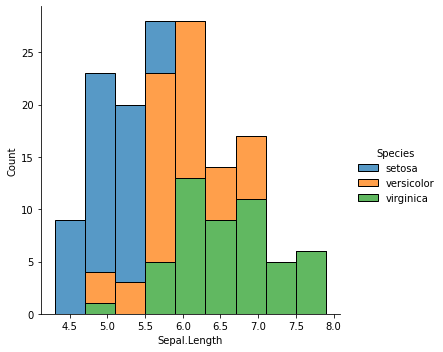

In [79]:
sns.displot(data=iris, x="Sepal.Length", hue="Species", multiple="stack")

In [80]:
iris_df = iris[iris.Species != "setosa"]

<AxesSubplot:xlabel='Sepal.Length', ylabel='Count'>

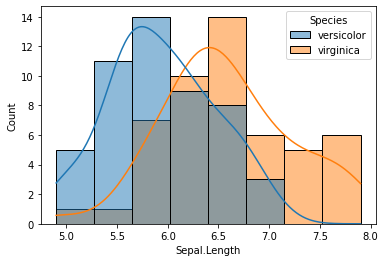

In [81]:
sns.histplot(iris_df, x="Sepal.Length", kde=True, hue="Species")

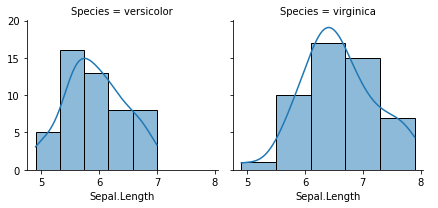

In [82]:
g = sns.FacetGrid(iris_df, col="Species")
g.map(sns.histplot, "Sepal.Length", kde=True, bins=5)
g.add_legend()

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid - IMBA

<AxesSubplot:xlabel='Sepal.Length', ylabel='Count'>

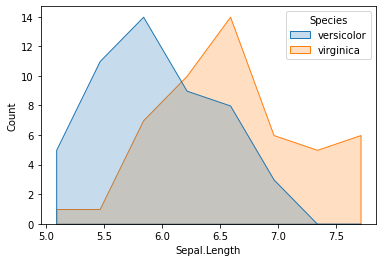

In [83]:
sns.histplot(iris_df, x="Sepal.Length", hue="Species", element="poly") 

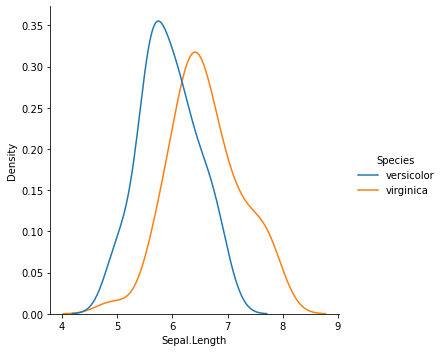

In [84]:
sns.displot(iris_df, x="Sepal.Length", hue="Species", kind="kde")

<AxesSubplot:xlabel='Sepal.Length', ylabel='Density'>

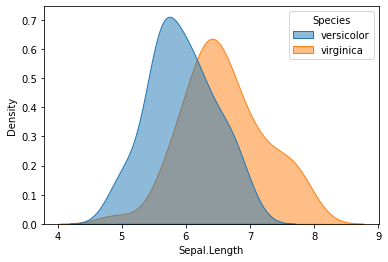

In [85]:
sns.kdeplot(data=iris_df, x="Sepal.Length", hue="Species", fill=True, common_norm=False, alpha=.5, linewidth=1)

<AxesSubplot:xlabel='Species', ylabel='Sepal.Length'>

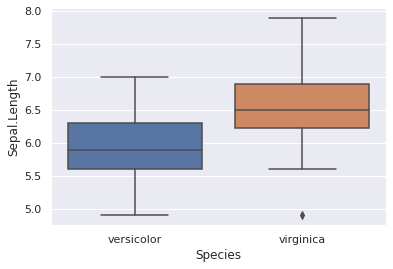

In [86]:
sns.set_theme(style="darkgrid")
sns.boxplot(y="Sepal.Length", x="Species", data=iris_df)

In [87]:
# Perform the Shapiro-Wilk test for normality.
shapiro_test = stats.shapiro(iris_df["Sepal.Length"])
shapiro_test

ShapiroResult(statistic=0.9805403351783752, pvalue=0.1464301496744156)

In [88]:
shapiro_test_1 = stats.shapiro(iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
shapiro_test_2 = stats.shapiro(iris_df[iris_df.Species == "virginica"]["Sepal.Length"])
[shapiro_test_1, shapiro_test_2]

[ShapiroResult(statistic=0.9778355956077576, pvalue=0.46473264694213867),
 ShapiroResult(statistic=0.9711798429489136, pvalue=0.25832483172416687)]

In [90]:
# Perform Bartlett’s test for equal variances.
# Гомогенность дисперсии проверяем, короче.
stat, p = st.bartlett(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

The test statistic is 2.094933311010139. 
The p-value of the test is 0.14778816016231236.


In [91]:
# Calculate the T-test for the means of two independent samples of scores.
t_test = st.ttest_ind(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]) #, equal_var=True
t_test

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)

In [92]:
# Проверяем гипотезу о том, что среднее значение длины чашелистика в генеральной совокупности (датасете) равно 8.
# Для этого используем одновыборочный Т-тест. 
t_test = st.ttest_1samp(iris_df["Sepal.Length"], 8) 
t_test

Ttest_1sampResult(statistic=-26.22072564309469, pvalue=2.3864526432268e-46)

Как и следовало ожидать - нет, среднее значение "Sepal.Length" не равно 8.

In [93]:
import numpy as np
import scipy.stats

# Самописная фукнция с просторов интернета, которая вычисляет доверительный интервал. Полезно!
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [94]:
mean_confidence_interval(iris_df["Sepal.Length"])

(6.2620000000000005, 6.130479266795949, 6.393520733204052)

In [95]:
# Расчёт доверительных интервалов
import numpy as np, scipy.stats as st

a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]

print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)),
      st.t.interval(0.95, len(b)-1, loc=np.mean(b), scale=st.sem(b)))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html?highlight=scipy%20stats%20t#scipy.stats.t

(5.789305783299542, 6.082694216700458) (6.4072850193549105, 6.768714980645086)


In [96]:
print(mean_confidence_interval(a),
      mean_confidence_interval(b))

(5.936, 5.789305783299542, 6.082694216700458) (6.587999999999998, 6.4072850193549105, 6.768714980645086)


Вывод - самописная функция повторяет метод .interval из библиотеки scipy.

Отлично!

In [ ]:
print(a.quantile([0.05, 0.95]), "\n\n",
      b.quantile([0.05, 0.95]))
print("\n\n")
print(iris_df["Sepal.Length"].quantile([0.05, 0.95]))

Итого - метод квантиль какой-то странный. Что-то тут не так, очевидно. Лучше его не использовать. 

Надо бы разобраться, почему такая разница.

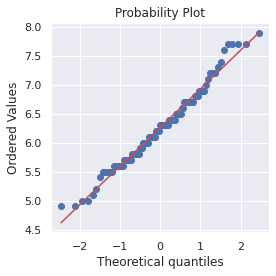

In [97]:
fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(iris_df["Sepal.Length"], plot=ax)

plt.tight_layout()
plt.show()

In [98]:
# Парный Т-тест
pt_test = scipy.stats.ttest_rel(iris_df["Sepal.Length"], iris_df["Sepal.Width"])
pt_test

Ttest_relResult(statistic=61.30714401143194, pvalue=1.4790717979416083e-80)

Для визуализации "планок погрешностей" можно использовать:

- matplotlib, а именно matplotlib.pyplot.errorbar: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html

- seaborn.pointplot: https://seaborn.pydata.org/generated/seaborn.pointplot.html

In [99]:
iris_df.Species.unique()

array(['versicolor', 'virginica'], dtype=object)

In [100]:
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
a

5.936

<ErrorbarContainer object of 3 artists>

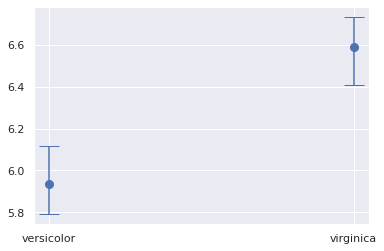

In [101]:
# Хехе, получилось!
a_origin = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
b_origin = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"].mean()

plt.errorbar(x=iris_df.Species.unique(), y=[a, b], 
             yerr=[a-st.t.interval(0.95, len(a_origin)-1, loc=np.mean(a_origin), scale=st.sem(a_origin)), 
                  b-st.t.interval(0.95, len(b_origin)-1, loc=np.mean(b_origin), scale=st.sem(b_origin))],
             data=iris_df, fmt="o", markersize=8, capsize=10) # fmt="-o", "--o", ".k"

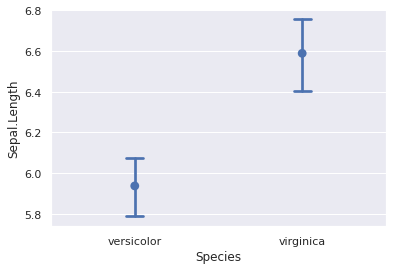

In [102]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="Species", y="Sepal.Length", data=iris_df, join=False, capsize=.1)

In [103]:
# Непараметрический тест на нормальность (Манна-Уитни), в англоязычной литературе - Уилкоксона
wtest = scipy.stats.wilcoxon(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                            iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(wtest)
mw_test = scipy.stats.mannwhitneyu(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                                   iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(mw_test)
# Получается, что реализации этих тестов различаются в R и Python. Подробности по ссылке:
# https://stackoverflow.com/questions/33579785/difference-between-wilcoxon-test-in-r-and-python
# Вывод - Можно использовать и Python, но если p-value различаются, то лучше полагаться на R.
# Однако, немаловажно отметить, что тест Бартлетта и Т-тест совпадают. 

WilcoxonResult(statistic=171.0, pvalue=1.883485656410222e-05)
MannwhitneyuResult(statistic=526.0, pvalue=2.9345032053320985e-07)


In [104]:
model_iris = smf.ols('iris["Sepal.Width"] ~ Species', data=iris).fit()
model_iris.summary() if str(input()) == "1" else print(model_iris.summary())

2
                             OLS Regression Results                            
Dep. Variable:     iris["Sepal.Width"]   R-squared:                       0.401
Model:                             OLS   Adj. R-squared:                  0.393
Method:                  Least Squares   F-statistic:                     49.16
Date:                 Wed, 04 Nov 2020   Prob (F-statistic):           4.49e-17
Time:                         12:19:09   Log-Likelihood:                -49.366
No. Observations:                  150   AIC:                             104.7
Df Residuals:                      147   BIC:                             113.8
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept         

In [105]:
aov_table_iris = sm.stats.anova_lm(model_iris)
aov_table_iris

,df,sum_sq,mean_sq,F,PR(>F)
Species,2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


In [106]:
tukey_test_result_iris = sm.stats.multicomp.pairwise_tukeyhsd(endog=iris["Sepal.Width"], groups=iris["Species"])
print(tukey_test_result_iris)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658  0.001 -0.8189 -0.4971   True
    setosa  virginica   -0.454  0.001 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


In [ ]:
# import seaborn as sns
# import statsmodels.api as sm

# iris = sns.load_dataset("iris")
# tukey_test_result_iris = sm.stats.multicomp.pairwise_tukeyhsd(endog=iris.sepal_width, groups=iris.species)
# print(tukey_test_result_iris)

In [ ]:
# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15 (1).txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# df.head()

In [ ]:
# stat, p = scipy.stats.bartlett(df[df.V2 == 1]["V1"], 
#                                df[df.V2 == 2]["V1"])
# print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

In [ ]:
# wtest = scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], 
#                              df[df.V2 == 2]["V1"], mode='approx')
# wtest

In [ ]:
# scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print(scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]) if (scipy.stats.bartlett(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1] < 0.05) else print(scipy.stats.ttest_ind(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1])

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_16.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print("{} {} {}".format(df.V1.mean(),df.V2.mean(),scipy.stats.ttest_ind(df.V1, df.V2)[1])) if (scipy.stats.ttest_ind(df.V1, df.V2)[1] < 0.05) else print("The difference is not significant")

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
tooth_path = DATA + "ToothGrowth.csv"
toothgrowth = pd.read_csv(tooth_path, index_col=0)

In [ ]:
toothgrowth.head(10)

In [ ]:
toothgrowth.shape

In [ ]:
toothgrowth.describe()

In [ ]:
subset_oj = toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)]
subset_vc = toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)]

In [ ]:
t_test = scipy.stats.ttest_ind(subset_oj.len, subset_vc.len) 
t_test.statistic

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# tooth_path = PATH_TO_DATA + "ToothGrowth.csv"
# toothgrowth = pd.read_csv(tooth_path, index_col=0)
# t_test = scipy.stats.ttest_ind(toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)].len, 
#                                toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)].len) 
# print(t_test.statistic)

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
lec_path = DATA + "lekarstva.csv"
lekarstva = pd.read_csv(lec_path, index_col=0)

In [ ]:
print(lekarstva.shape)
lekarstva.head()

In [ ]:
lekarstva.describe()

In [ ]:
lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_after, lekarstva.Pressure_before) 
lec_pair_t_test.statistic

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# lec_path = PATH_TO_DATA + "lekarstva.csv"
# lekarstva = pd.read_csv(lec_path, index_col=0)
# lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_before, lekarstva.Pressure_after) 
# print(lec_pair_t_test.statistic)

## NEW CHAPTER AND NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
grants_path = DATA + "grants.csv"
grants = pd.read_csv(grants_path)

In [ ]:
grants.head()

In [ ]:
grants.shape

In [ ]:
grants.isna().sum()

In [ ]:
grants.describe()

In [ ]:
grants_df = grants.copy()

In [ ]:
grants_df["status"] = grants_df["status"].replace({0 : "Not funded", 1 : "Funded"})

In [ ]:
grants_df["status"].unique()

In [ ]:
grants_df.head(3)

In [ ]:
table_1 = pd.pivot_table(grants_df, index="status", values="field", aggfunc="count")
table_1

In [ ]:
table_2 = pd.pivot_table(grants_df, index=["field"], columns=["status"], aggfunc="count")
table_2

In [ ]:
# Неудачные попытки
# -----------------------------
# grants_df.groupby(["field", "status"]).agg({"status" : "count"}).unstack()
# -----------------------------
# table_2 = grants_df.pivot_table(index="status", columns=["field"], aggfunc="count")
# table_2

In [ ]:
dist = grants_df.groupby(["field", "status"])["status"].count().unstack()
dist

In [ ]:
# Binom test
p_value_1 = scipy.stats.binom_test(table_1)
p_value_1

In [ ]:
# ChiSquare test
cs_res_1 = scipy.stats.chisquare(table_1)
print(cs_res_1)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_1[0], cs_res_1[1]))

In [ ]:
cs_res_2 = scipy.stats.chisquare(dist.T)
cs_res_2

### New Dataset

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path)

In [ ]:
hec = hec.drop("Unnamed: 0", axis=1)

In [ ]:
hec.head()

In [ ]:
hec_fem = hec[hec.Sex == "Female"]
hec_fem

In [ ]:
# Неудачные попытки
# sns.histplot(data=hec_fem, x="Hair", y="Freq")

In [ ]:
sns.catplot(data=hec_fem, x="Hair", y="Freq", hue="Eye", kind="bar")

In [ ]:
# Как сделать хорошо и правильно? - Посмотри туториалы.
# titanic = sns.load_dataset("titanic")
# sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

In [ ]:
hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]]

In [ ]:
brown_haired_ladies = hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]].set_index("Eye")
brown_haired_ladies

In [ ]:
cs_res_3 = scipy.stats.chisquare(brown_haired_ladies)
print(cs_res_3)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_3[0], cs_res_3[1]))

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path, index_col=0)
brown_haired_ladies = hec.query("Sex == 'Female' and Hair == 'Brown'").iloc[:,[1, 3]].set_index("Eye")
chisquare_result = scipy.stats.chisquare(brown_haired_ladies)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(chisquare_result[0], chisquare_result[1]))

### New Dataset

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

In [ ]:
diamonds = diamonds.sort_values(by=['color', 'cut'])

In [ ]:
sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.8)

In [ ]:
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = diamonds.sort_values(by=['color', 'cut'])
# sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.7)

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color']).agg({"color" : "count"}).unstack()
d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
print(d.shape)
d

In [ ]:
# НЕПРАВИЛЬНО!

# chisquare_result = scipy.stats.chisquare(d, axis=None)
# chisquare_result
# -------------------------------------------------------------
# ПРАВИЛЬНО!
chisquare_result = scipy.stats.chi2_contingency(d)
chisquare_result

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result

In [ ]:
# table_diamonds = pd.pivot_table(diamonds, index=["cut"], columns=["color"], aggfunc="count")
# table_diamonds

In [ ]:
diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)

In [ ]:
d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
d

In [ ]:
chisquare_result = scipy.stats.chi2_contingency(d)
chisquare_result[0]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import numpy as np
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
# diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)
# d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result[0]

### Game: Megafon and N+1
#### https://nplus1.ru/material/2020/10/27/megafon

In [ ]:
import re

In [ ]:
PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"
game_df_1 = pd.read_csv(PATH_TO_DATA + "first.csv", sep=";", header=None)
game_df_1.head(10)

In [ ]:
game_df_1.columns = ["transaction_id", "company_name", "transaction_amount", "comment"]
game_df_1

In [ ]:
type(game_df_1.iloc[:,1])

In [ ]:
game_df_1[game_df_1.iloc[:,1].str.contains(r'([a-z|0-9]{8})(-[a-z|0-9]{4}){3}(-[a-z|0-9]{12})', regex=True)]

In [ ]:
# PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"

game_df_2 = pd.read_csv(PATH_TO_DATA + "dva.csv", sep=";", verbose=True)
game_df_2.head(10)

# NEW CHAPTER
# ANOVA

Он же - дисперсионный анализ: однофакторный и многофакторный.

In [ ]:
import sys

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
shops_path = DATA + "shops.csv"
shops = pd.read_csv(shops_path, index_col=0)
shops.head()

In [ ]:
shops.index.unique()

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="origin", y="price", data=shops, kind="box")

In [ ]:
model = smf.ols('price ~ origin', data=shops).fit()
model.summary() if str(input()) == "1" else print(model.summary())

In [ ]:
aov_table = sm.stats.anova_lm(model)
aov_table

In [ ]:
model_2 = smf.ols('price ~ origin + store', data=shops).fit()
model_2.summary() if str(input()) == "1" else print(model_2.summary())

In [ ]:
aov_table_2 = sm.stats.anova_lm(model_2)
aov_table_2

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="store", y="price", hue="origin", data=shops, join=True, capsize=.1, dodge=True)

In [ ]:
model_3 = smf.ols('price ~ origin + store + origin:store', data=shops).fit() # same result: 'price ~ origin * store' 
model_3.summary() if str(input()) == "1" else print(model_3.summary())

In [ ]:
aov_table_3 = sm.stats.anova_lm(model_3)
aov_table_3

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x=shops.index, y="price", data=shops, kind="box")

In [ ]:
model_4 = smf.ols('price ~ shops.index', data=shops).fit() 
model_4.summary() if str(input()) == "1" else print(model_4.summary())

In [ ]:
aov_table_4 = sm.stats.anova_lm(model_4)
aov_table_4

In [ ]:
# Не работает. По причине того, что индекс имеет текстовый формат. Пришлось перезагружать датасет с другим индексом.
# tukey_test_result = sm.stats.multicomp.pairwise_tukeyhsd(endog=shops.index.unique(), groups="price")

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
shops_path = DATA + "shops.csv"
shops_2 = pd.read_csv(shops_path)
shops_2.head()

In [ ]:
tukey_test_result_shops = sm.stats.multicomp.pairwise_tukeyhsd(endog=shops_2["price"], groups=shops_2["food"])
print(tukey_test_result_shops)

In [ ]:
# tukey_test_result_shops

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
npk_path = DATA + "npk.csv"
npk = pd.read_csv(npk_path, index_col=0)
npk = npk.rename(columns={"yield" : "growth"})
npk.head()

In [ ]:
model_npk = smf.ols('growth ~ N * P', data=npk).fit()
model_npk.summary() if str(input()) == "1" else print(model_npk.summary())

In [ ]:
aov_table_npk = sm.stats.anova_lm(model_npk)
aov_table_npk.unstack()["PR(>F)"]["N:P"]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/PycharmProjects/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"}) # Пришлось переименовать столбец, иначе функция из библиотеки statsmodels.formula.api "спотыкается" о формулу
# model_npk = smf.ols('growth ~ N * P', data=npk).fit()
# aov_table_npk = sm.stats.anova_lm(model_npk)
# aov_table_npk.unstack()["PR(>F)"]["N:P"]

In [ ]:
model_npk_2 = smf.ols('growth ~ N + P + K', data=npk).fit()
model_npk_2.summary() if str(input()) == "1" else print(model_npk_2.summary())

In [ ]:
aov_table_npk_2 = sm.stats.anova_lm(model_npk_2)
aov_table_npk_2.unstack()["PR(>F)"]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/PycharmProjects/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"})
# model_npk_2 = smf.ols('growth ~ N + P + K', data=npk).fit()
# aov_table_npk_2 = sm.stats.anova_lm(model_npk_2)
# aov_table_npk_2.unstack()["PR(>F)"]

### NEW DATASET

In [108]:
DATA = "~/PycharmProjects/Datasets/"
therapy_path = DATA + "therapy_data.csv"
therapy = pd.read_csv(therapy_path)
therapy.head()

,subject,sex,therapy,price,well_being
0,1,female,therapy1,low,54.290999
1,1,female,therapy2,low,62.558225
2,1,female,placebo,low,28.139338
3,2,female,therapy1,low,35.903914
4,2,female,therapy2,low,28.129274


In [110]:
model_therapy = smf.ols('well_being ~ therapy', data=therapy).fit()
model_therapy.summary() if str(input()) == "1" else print(model_therapy.summary())

2
                            OLS Regression Results                            
Dep. Variable:             well_being   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.6681
Date:                Wed, 04 Nov 2020   Prob (F-statistic):              0.521
Time:                        12:33:46   Log-Likelihood:                -127.49
No. Observations:                  30   AIC:                             261.0
Df Residuals:                      27   BIC:                             265.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              46.2584  

In [111]:
aov_table_therapy = sm.stats.anova_lm(model_therapy)
aov_table_therapy

,df,sum_sq,mean_sq,F,PR(>F)
therapy,2.0,426.836426,213.418213,0.668099,0.520954
Residual,27.0,8624.909767,319.441102,NaN,NaN


#### Оказывается, что на данный момент в statsmodels не реализована ANOVA с повторными наблюдениями! 

https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.AnovaRM.html#statsmodels.stats.anova.AnovaRM

Точнее класс-то есть, а реализации нет. Обидно до слёз! (нет)

Придётся использовать что-то другое, либо извращаться с имеющимися формулами.

In [126]:
# Не тот тип взаимодействия
model_therapy_2 = smf.ols('well_being ~ therapy + subject:therapy', data=therapy).fit() 
model_therapy_2.summary() if str(input()) == "1" else print(model_therapy_2.summary())

2
                            OLS Regression Results                            
Dep. Variable:             well_being   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.121
Method:                 Least Squares   F-statistic:                    0.3744
Date:                Wed, 04 Nov 2020   Prob (F-statistic):              0.861
Time:                        12:51:33   Log-Likelihood:                -127.08
No. Observations:                  30   AIC:                             266.2
Df Residuals:                      24   BIC:                             274.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept           

Вариант-затычка из statsmodels:

In [143]:
# Уже ближе к правде, но всё равно не совсем то. 
model_therapy_2 = smf.ols('well_being ~ therapy + C(subject)*C(therapy)', data=therapy).fit() 

In [144]:
aov_table_therapy_2 = sm.stats.anova_lm(model_therapy_2)
aov_table_therapy_2 

,df,sum_sq,mean_sq,F,PR(>F)
therapy,2.0,426.836426,213.418213,0.639668,0.541264
C(subject),4.0,860.022241,215.005560,0.644426,0.639228
C(therapy),2.0,1694.761974,847.380987,2.539815,0.112206
C(subject):C(therapy),8.0,3008.827954,376.103494,1.127277,0.399810
Residual,15.0,5004.582870,333.638858,NaN,NaN


#### А почему бы не попробовать пакет, в котором реализована ANOVA с повторными измерениями? 
Беглый гуглинг помог найти вот такое вот: 
- https://stackoverflow.com/questions/56744225/which-statsmodels-anova-model-for-within-and-between-subjects-design
-https://stackoverflow.com/questions/22534836/two-way-repeated-measures-anova-python-function

Ну, раз уж рекомендуют, то почему бы не попробовать? 
- https://pypi.org/project/pingouin/
- https://pingouin-stats.org/index.html

In [145]:
import pingouin as pg

ModuleNotFoundError: No module named 'pingouin'